In [6]:
library(fpp2)
#library(ggfortify)
library(gridExtra)
library(FitAR)

In [7]:
# 2. 교재 Forecasting: Principles and Practice, 섹션 8.11 (https://otexts.com/fppkr/arimaexercises.html)의 3 번 연습문제에 대해 답하라.
# 다음의 시계열에 대해, 적절한 박스-칵스(Box-Cox) 변환과 정상성을 나타내는 데이터를 얻기 위해서는 차분을 몇 번 구해야하는지 찾아봅시다.

# a.usnetelec
# b.usgdp
# c.mcopper
# d.enplanements
# e.visitors

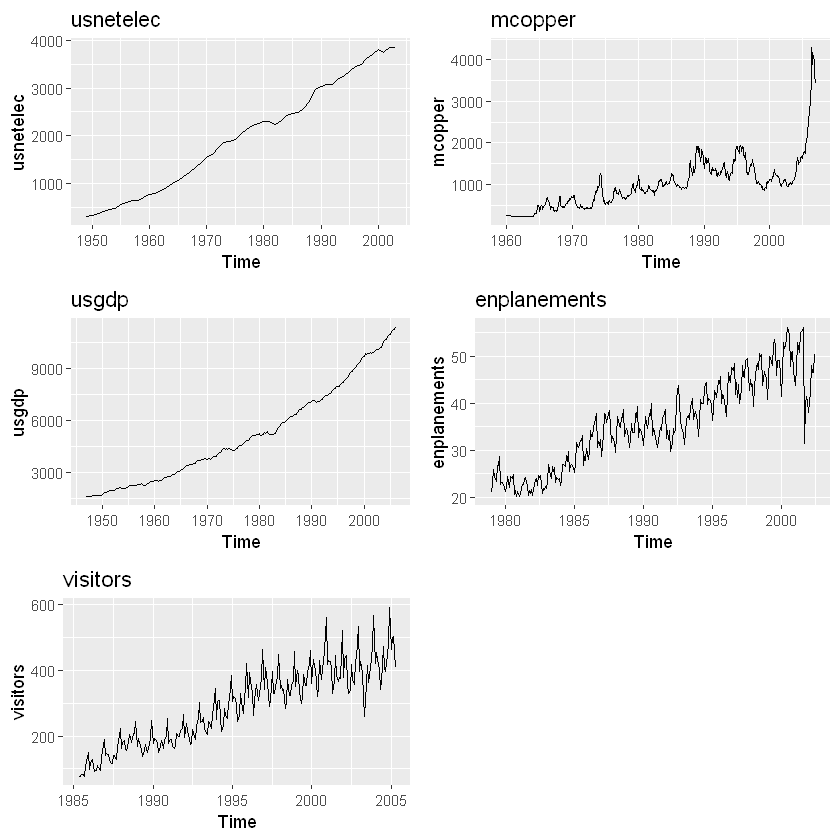

In [8]:
p1 <- autoplot(usnetelec) + ggtitle("usnetelec")
p2 <- autoplot(usgdp) + ggtitle("usgdp")
p3 <- autoplot(mcopper) + ggtitle("mcopper")
p4 <- autoplot(enplanements) + ggtitle("enplanements")
p5 <- autoplot(visitors) + ggtitle("visitors")

grid.arrange(p1, p2, p3, p4, p5,
    layout_matrix = rbind(
        c(1, 3),
        c(2, 4),
        c(5, 6)))

In [84]:
# a.usnetelec
fit1 <- auto.arima(usnetelec)
fit1

Series: usnetelec 
ARIMA(2,1,2) with drift 

Coefficients:
          ar1      ar2     ma1     ma2    drift
      -1.3032  -0.4332  1.5284  0.8340  66.1585
s.e.   0.2122   0.2084  0.1417  0.1185   7.5595

sigma^2 estimated as 2262:  log likelihood=-283.34
AIC=578.67   AICc=580.46   BIC=590.61

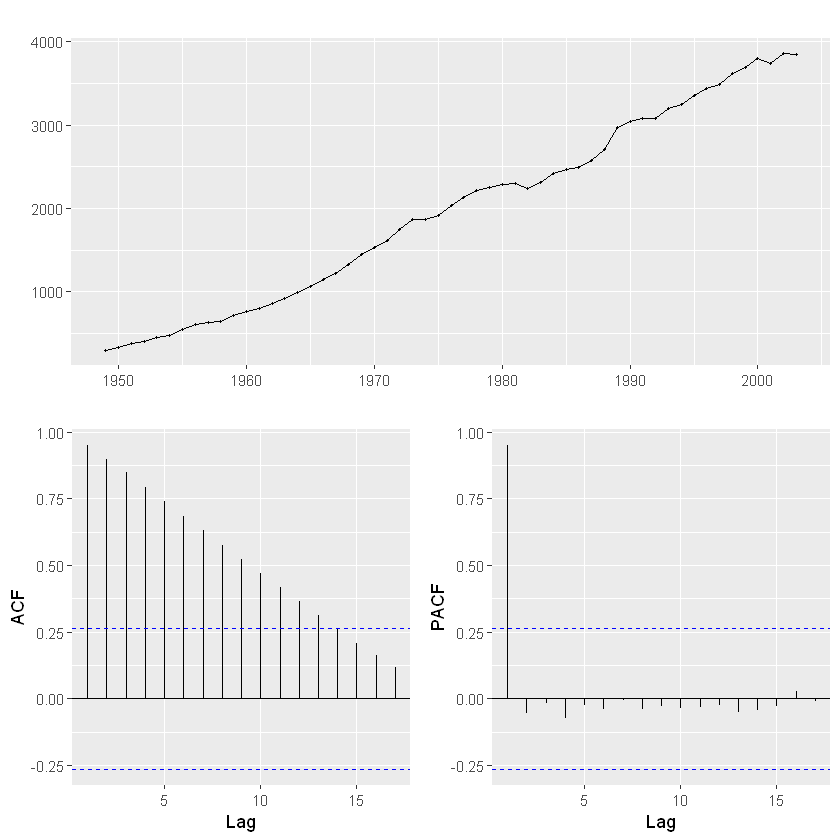

In [10]:
ggtsdisplay(usnetelec)

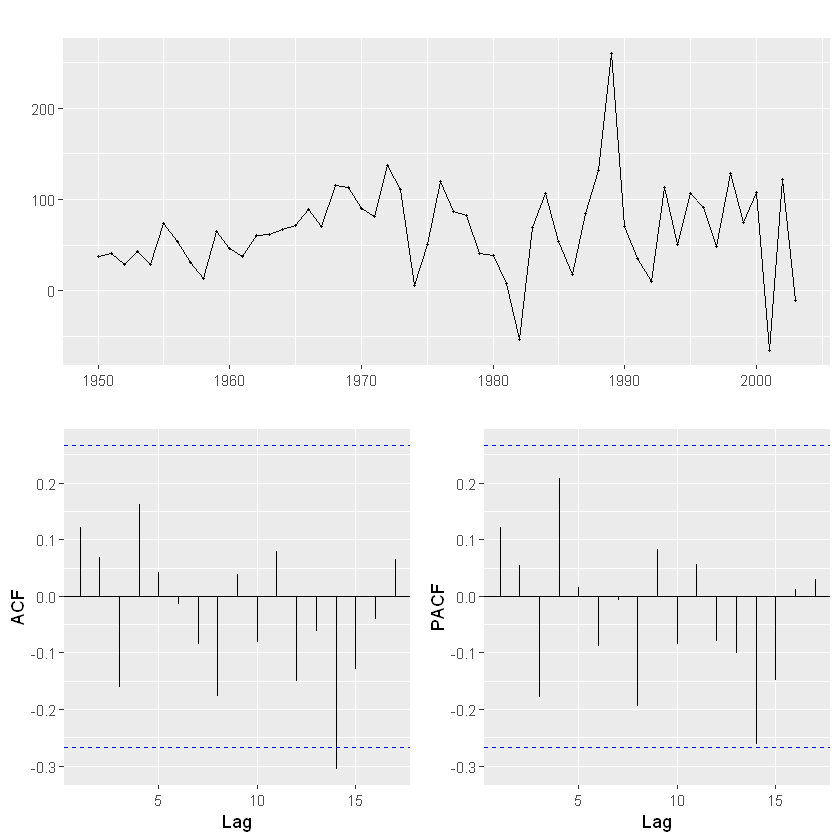

In [11]:
ggtsdisplay(diff(usnetelec))

In [12]:
Box.test(usnetelec, type = "Ljung-Box")
Box.test(diff(usnetelec), type = "Ljung-Box")


	Box-Ljung test

data:  usnetelec
X-squared = 52.549, df = 1, p-value = 4.196e-13



	Box-Ljung test

data:  diff(usnetelec)
X-squared = 0.8508, df = 1, p-value = 0.3563


 minimum data value <= 0 so -min+0.25 added to all values


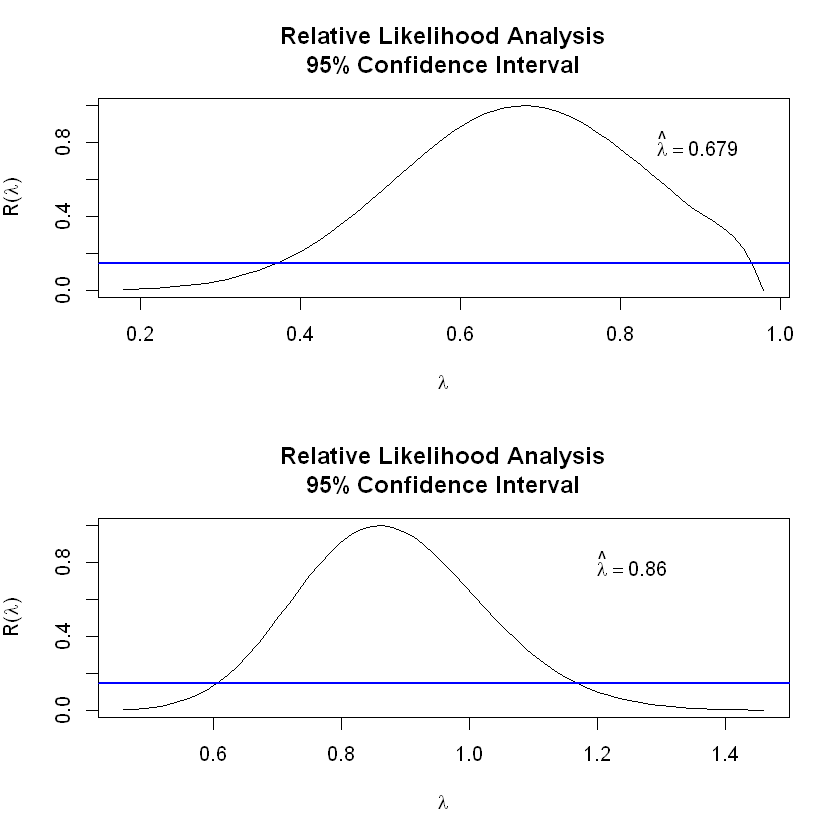

In [13]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
BoxCox(usnetelec)
BoxCox(diff(usnetelec))


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2) with drift
Q* = 2.7945, df = 5, p-value = 0.7316

Model df: 5.   Total lags used: 10



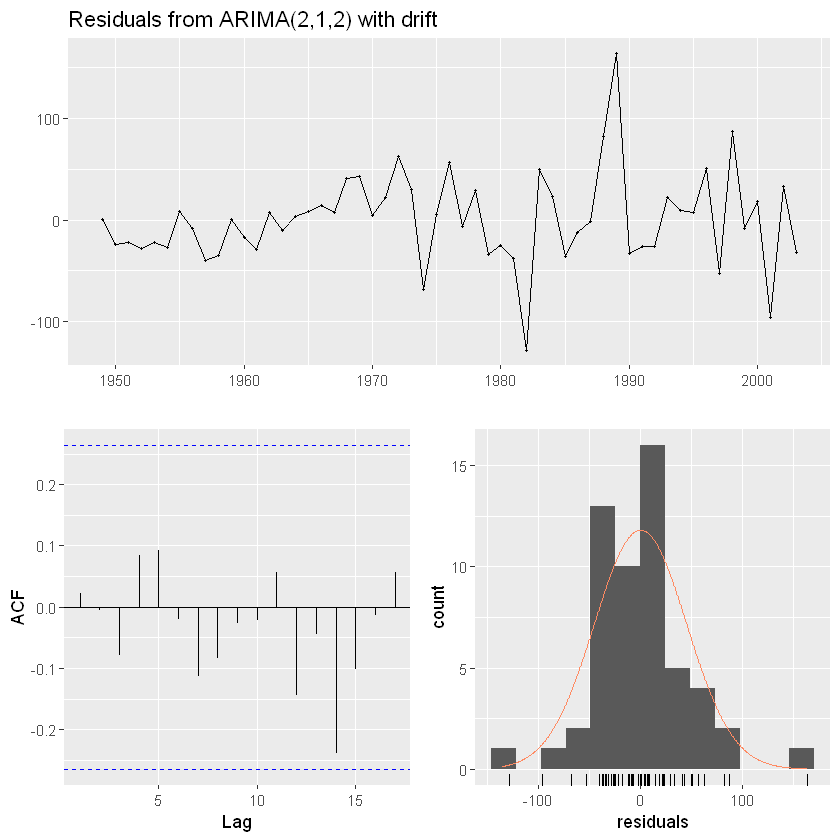

In [14]:
checkresiduals(fit1)

In [15]:
# b.usgdp
fit2 <- auto.arima(usgdp)
fit2

Series: usgdp 
ARIMA(2,2,2) 

Coefficients:
          ar1     ar2      ma1      ma2
      -0.1228  0.3106  -0.5835  -0.3669
s.e.   0.2869  0.0872   0.3004   0.2862

sigma^2 estimated as 1604:  log likelihood=-1199.57
AIC=2409.13   AICc=2409.39   BIC=2426.43

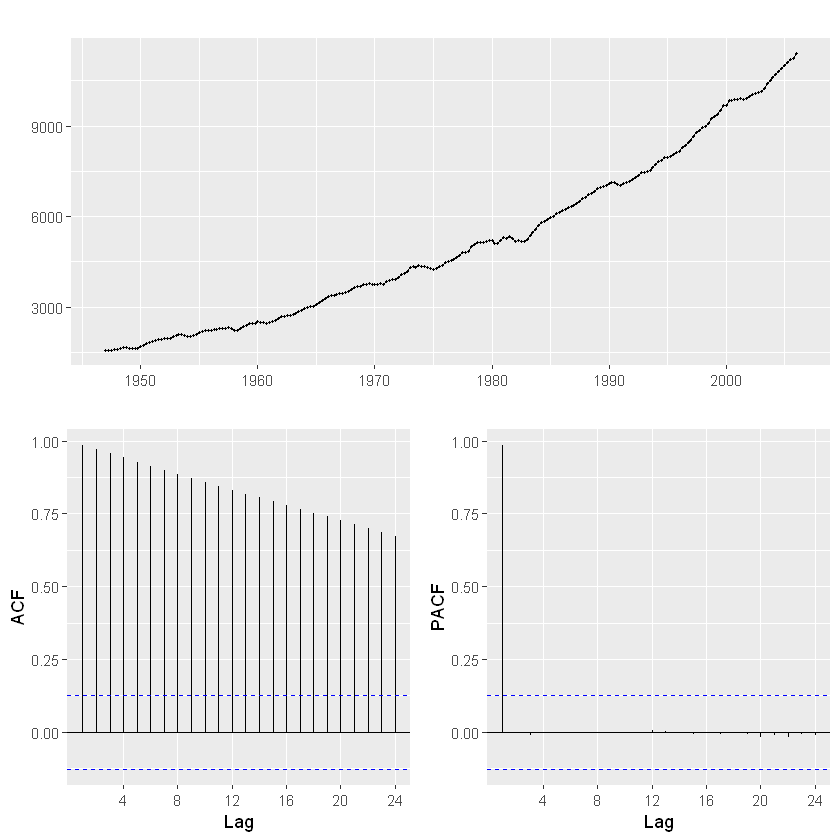

In [16]:
ggtsdisplay(usgdp)

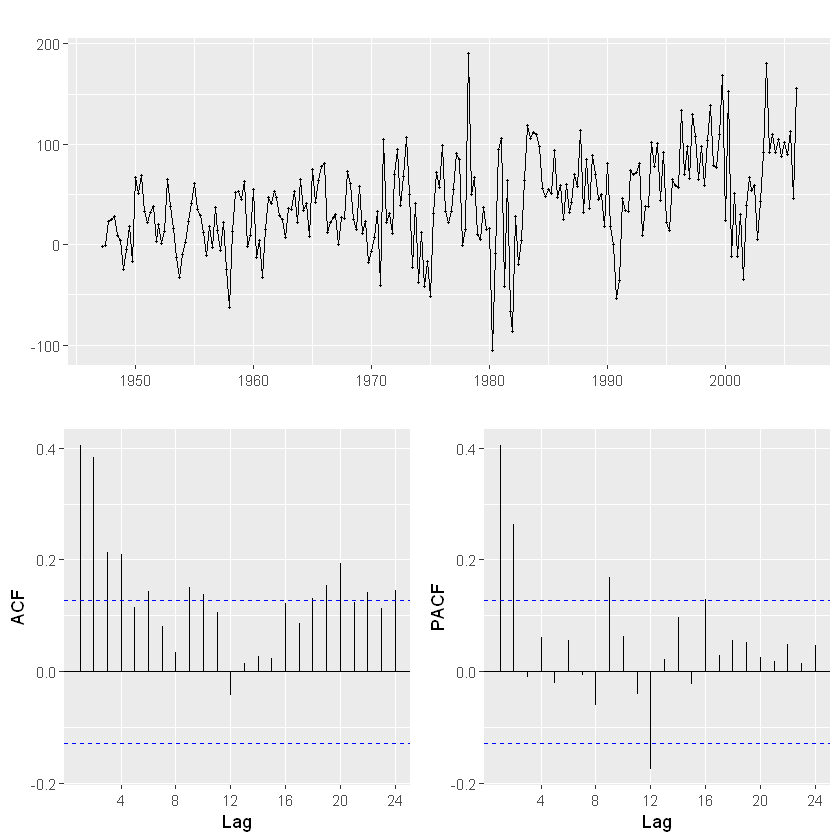

In [17]:
ggtsdisplay(diff(usgdp))

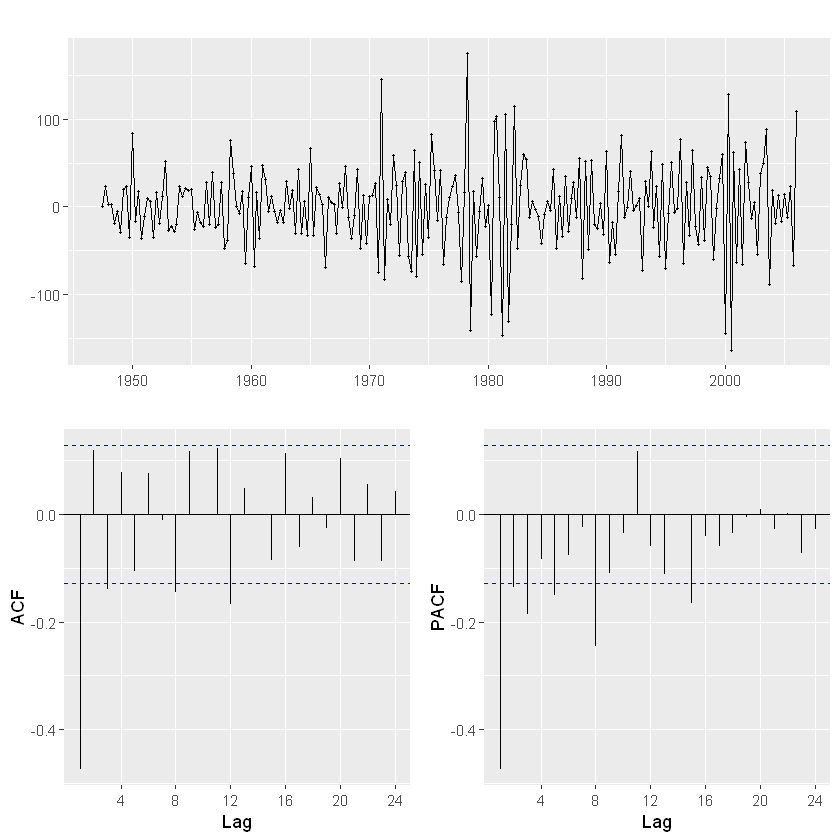

In [18]:
ggtsdisplay(diff(diff(usgdp)))

In [19]:
Box.test(usgdp, type = "Ljung-Box")
Box.test(diff(usgdp), type = "Ljung-Box")
Box.test(diff(diff(usgdp)), type = "Ljung-Box")


	Box-Ljung test

data:  usgdp
X-squared = 233.07, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  diff(usgdp)
X-squared = 39.187, df = 1, p-value = 3.85e-10



	Box-Ljung test

data:  diff(diff(usgdp))
X-squared = 53.294, df = 1, p-value = 2.872e-13


 minimum data value <= 0 so -min+0.25 added to all values
 minimum data value <= 0 so -min+0.25 added to all values


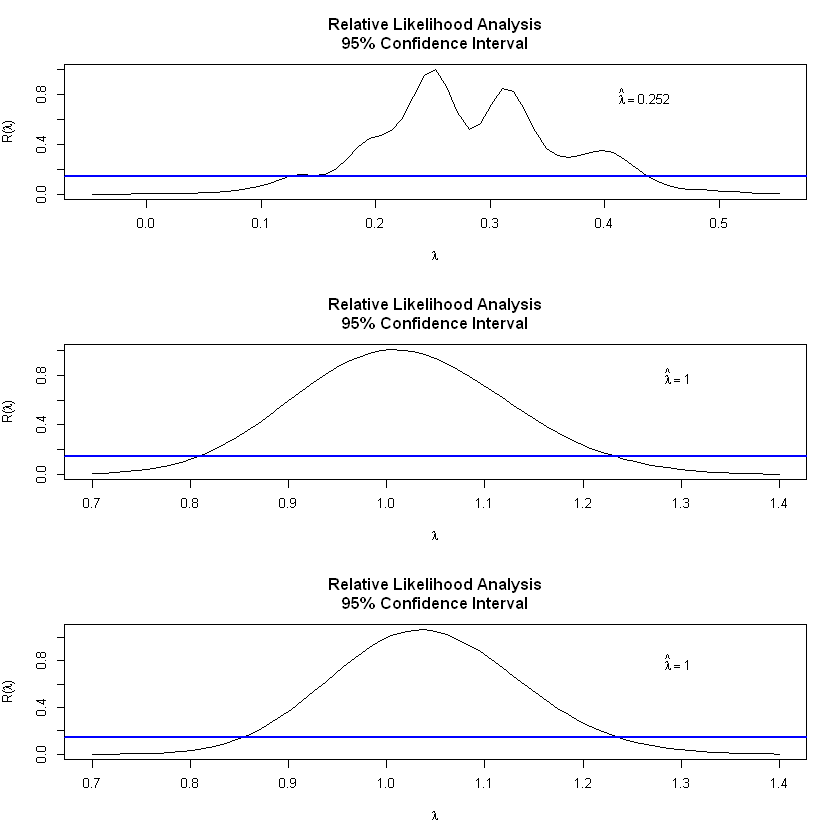

In [20]:
layout(mat=matrix(c(1,
                    2,
                    3), nrow=3, byrow = TRUE))
BoxCox(usgdp)
BoxCox(diff(usgdp))
BoxCox(diff(diff(usgdp)))


	Ljung-Box test

data:  Residuals from ARIMA(2,2,2)
Q* = 8.6247, df = 4, p-value = 0.0712

Model df: 4.   Total lags used: 8



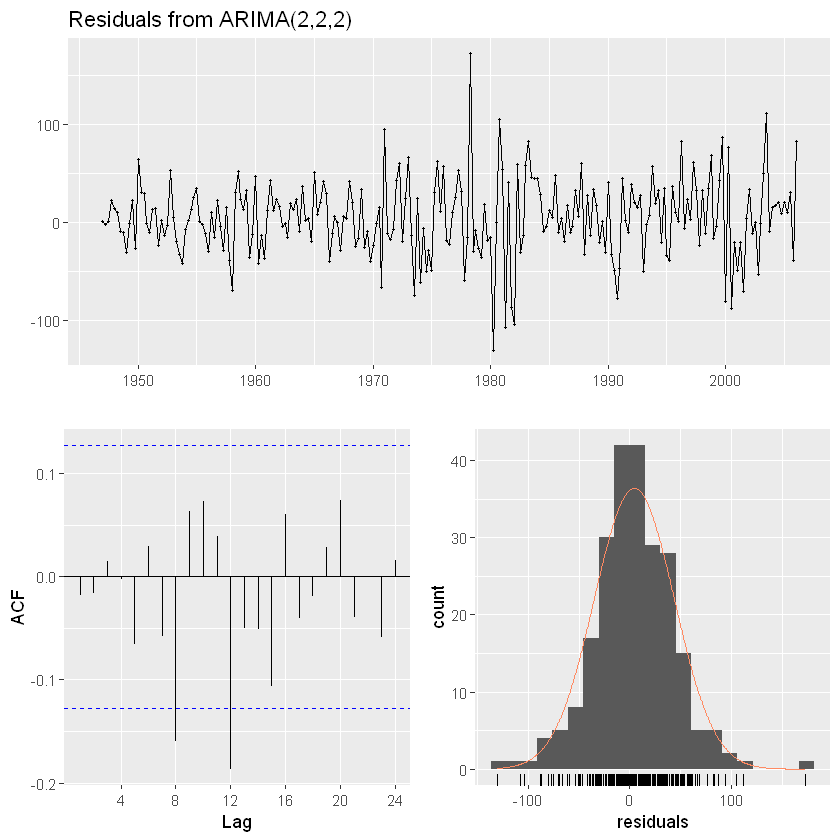

In [21]:
checkresiduals(fit2)

In [22]:
# c.mcopper
fit3 <- auto.arima(mcopper)
fit3

Series: mcopper 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.2900
s.e.  0.0419

sigma^2 estimated as 6026:  log likelihood=-3248.53
AIC=6501.07   AICc=6501.09   BIC=6509.73

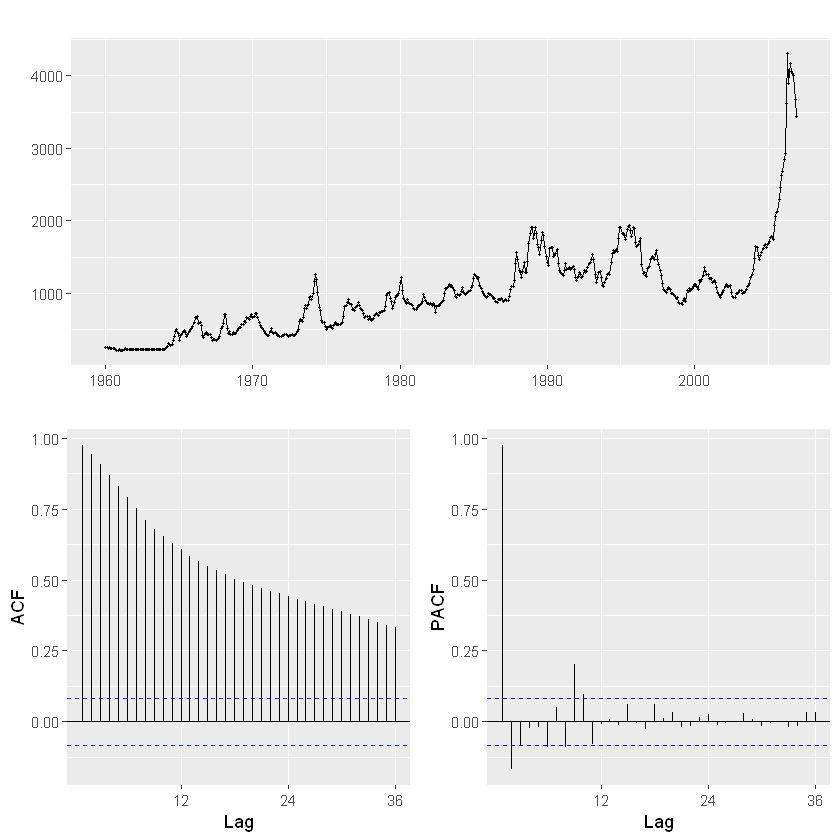

In [23]:
ggtsdisplay(mcopper)

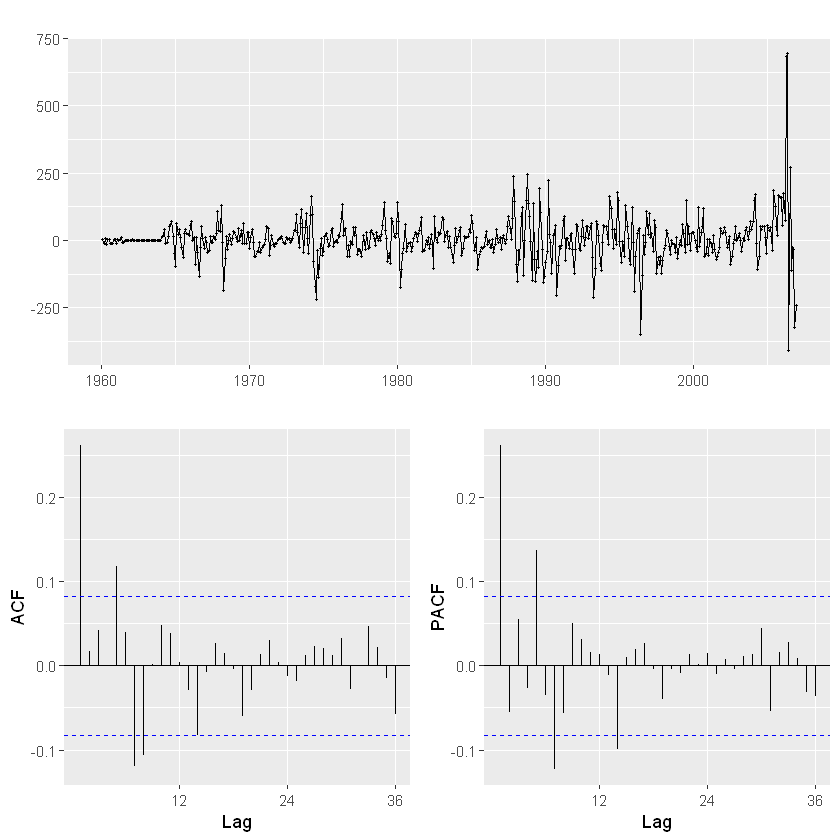

In [24]:
ggtsdisplay(diff(mcopper))

In [25]:
Box.test(mcopper, type = "Ljung-Box")
Box.test(diff(mcopper), type = "Ljung-Box")


	Box-Ljung test

data:  mcopper
X-squared = 539.54, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  diff(mcopper)
X-squared = 38.911, df = 1, p-value = 4.435e-10


 minimum data value <= 0 so -min+0.25 added to all values


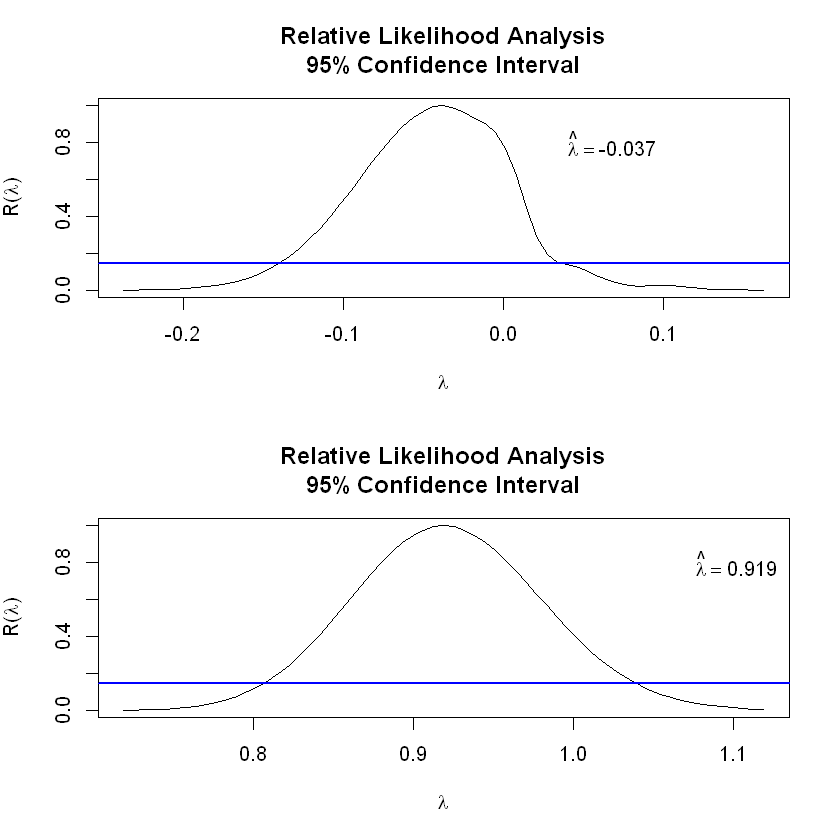

In [26]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
BoxCox(mcopper)
BoxCox(diff(mcopper))


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 30.716, df = 23, p-value = 0.1299

Model df: 1.   Total lags used: 24



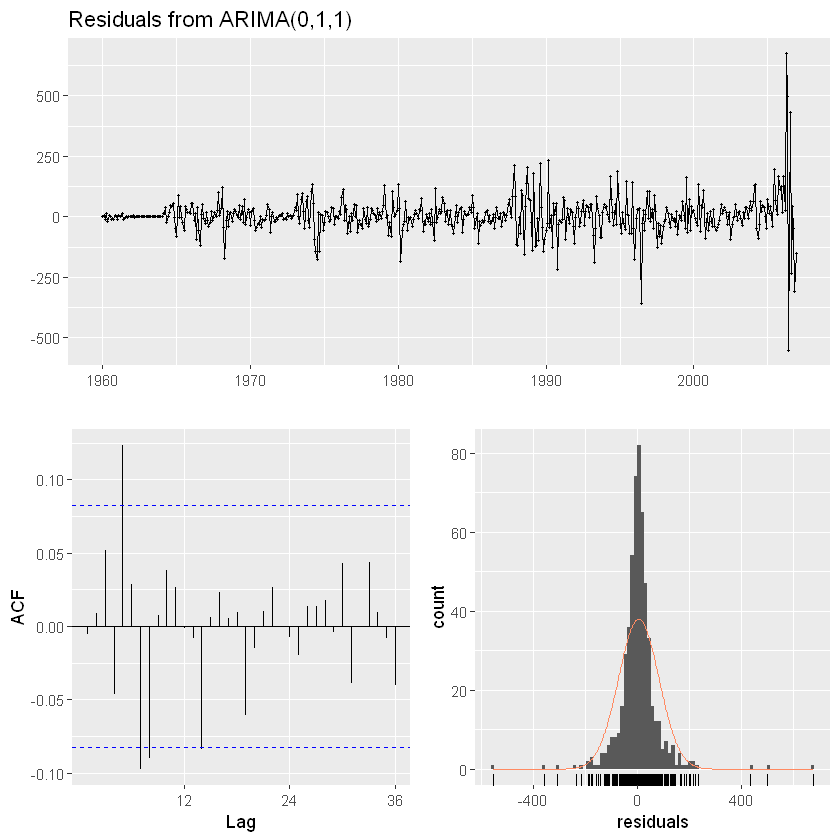

In [27]:
checkresiduals(fit3)

In [28]:
# 4.usnetelec

fit4 <- auto.arima(enplanements)
fit4

Series: enplanements 
ARIMA(2,0,1)(0,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     sma1
      1.3533  -0.3676  -0.7274  -0.4591
s.e.  0.1175   0.1115   0.0888   0.0969

sigma^2 estimated as 2.236:  log likelihood=-491.66
AIC=993.32   AICc=993.55   BIC=1011.31

In [61]:
print(round(decompose(enplanements)$seasonal, 2))

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1979 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1980 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1981 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1982 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1983 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1984 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1985 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1986 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1987 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1988 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1989 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1990 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90

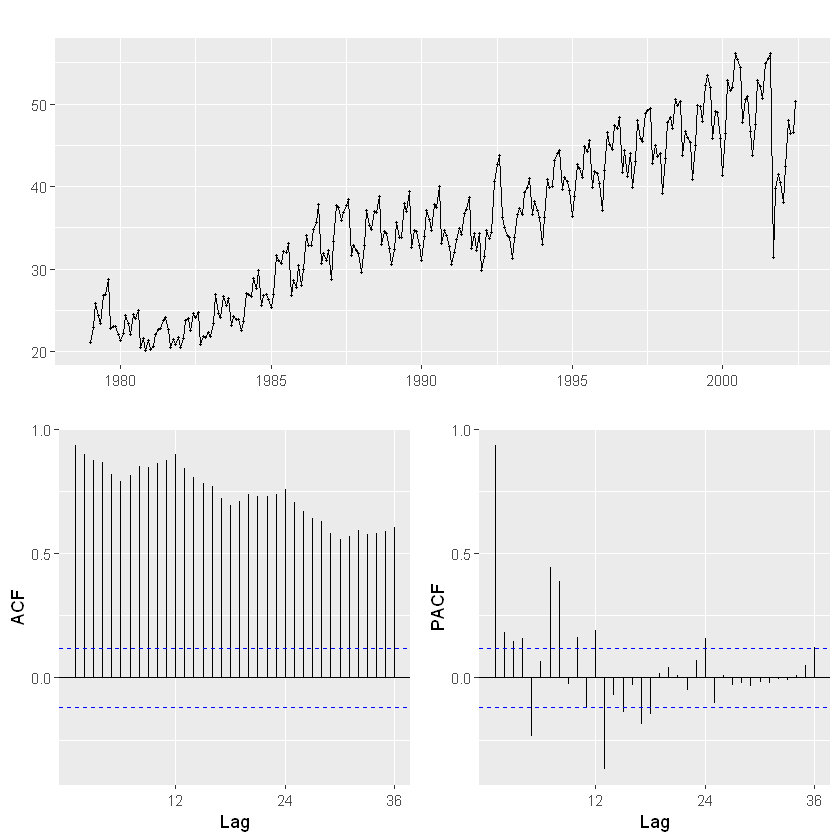

In [29]:
ggtsdisplay(enplanements)

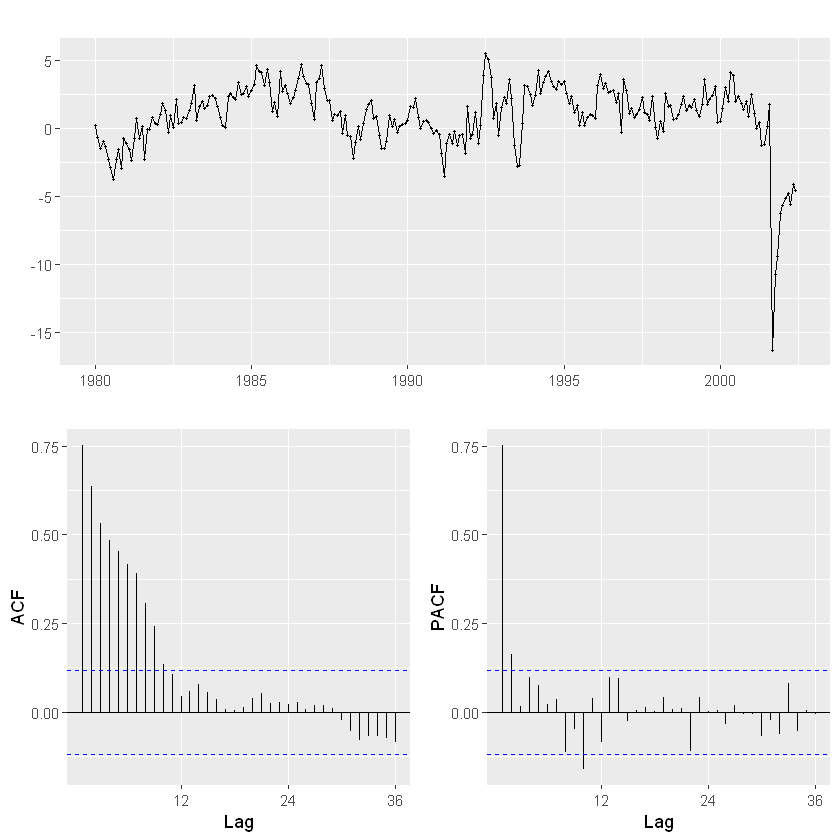

In [50]:
ggtsdisplay(diff(enplanements, lag = 12))

In [62]:
Box.test(enplanements, type = "Ljung-Box")
Box.test(diff(enplanements), type = "Ljung-Box")


	Box-Ljung test

data:  enplanements
X-squared = 249.22, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  diff(enplanements)
X-squared = 12.948, df = 1, p-value = 0.0003203


 minimum data value <= 0 so -min+0.25 added to all values


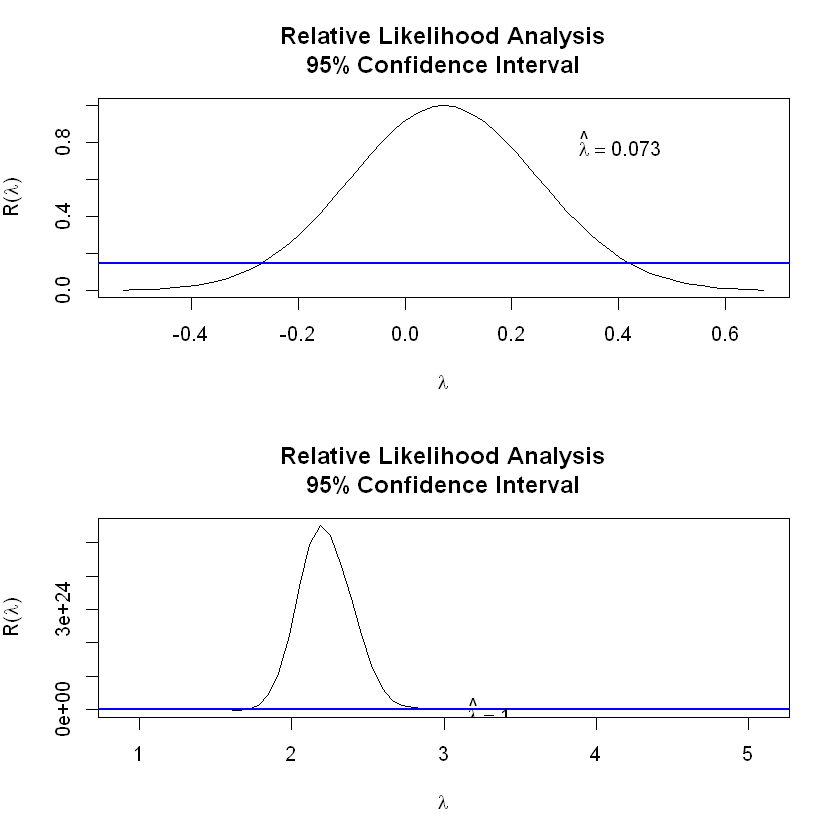

In [63]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
BoxCox(enplanements)
BoxCox(diff(enplanements))


	Ljung-Box test

data:  Residuals from ARIMA(2,0,1)(0,1,1)[12]
Q* = 15.625, df = 20, p-value = 0.7396

Model df: 4.   Total lags used: 24



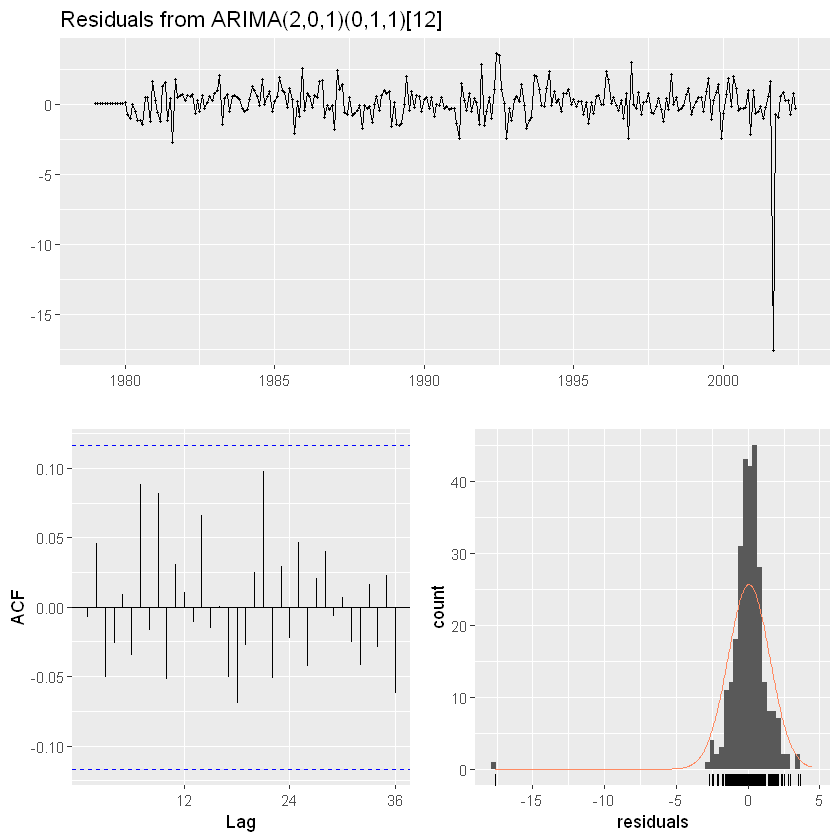

In [64]:
checkresiduals(fit4)

In [65]:
fit5 <- auto.arima(visitors)
fit5

Series: visitors 
ARIMA(1,0,1)(0,1,2)[12] with drift 

Coefficients:
         ar1      ma1     sma1    sma2   drift
      0.8968  -0.3187  -0.7110  0.1461  1.4820
s.e.  0.0379   0.0804   0.0753  0.0723  0.2667

sigma^2 estimated as 279.9:  log likelihood=-966.83
AIC=1945.66   AICc=1946.04   BIC=1966.24

In [77]:
print(round(decompose(visitors)$seasonal, 1))

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1985                         -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1986  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1987  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1988  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1989  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1990  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1991  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1992  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1993  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1994  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1995  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1996  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5

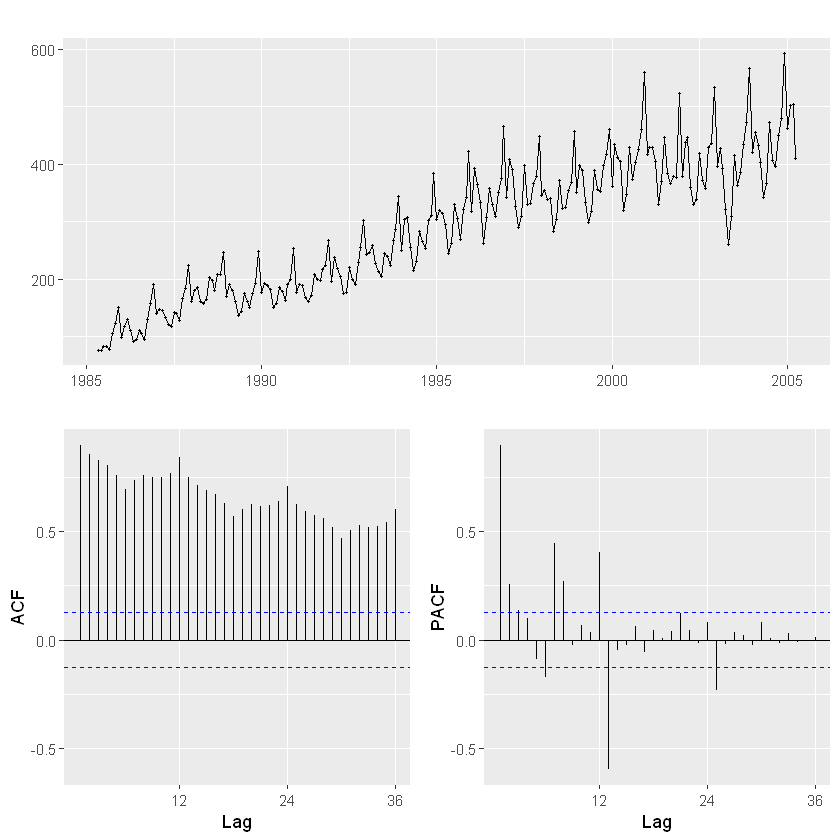

In [82]:
ggtsdisplay(visitors)

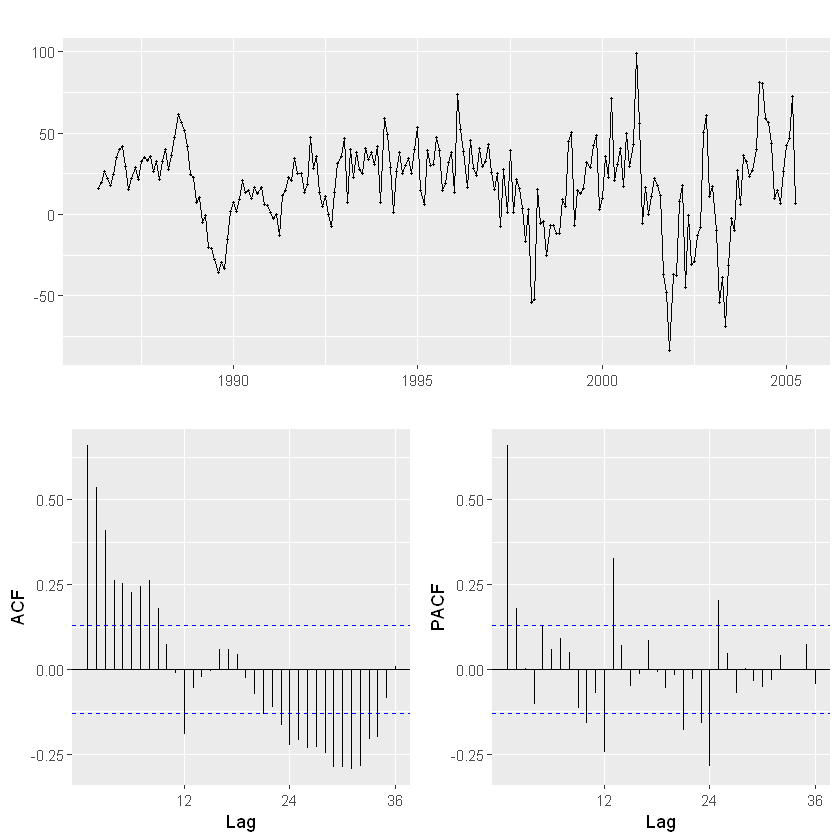

In [68]:
ggtsdisplay(diff(visitors, lag = 12))

In [69]:
Box.test(visitors, type = "Ljung-Box")
Box.test(diff(visitors, lag = 12), type = "Ljung-Box")


	Box-Ljung test

data:  visitors
X-squared = 195.64, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  diff(visitors, lag = 12)
X-squared = 100.64, df = 1, p-value < 2.2e-16


 minimum data value <= 0 so -min+0.25 added to all values


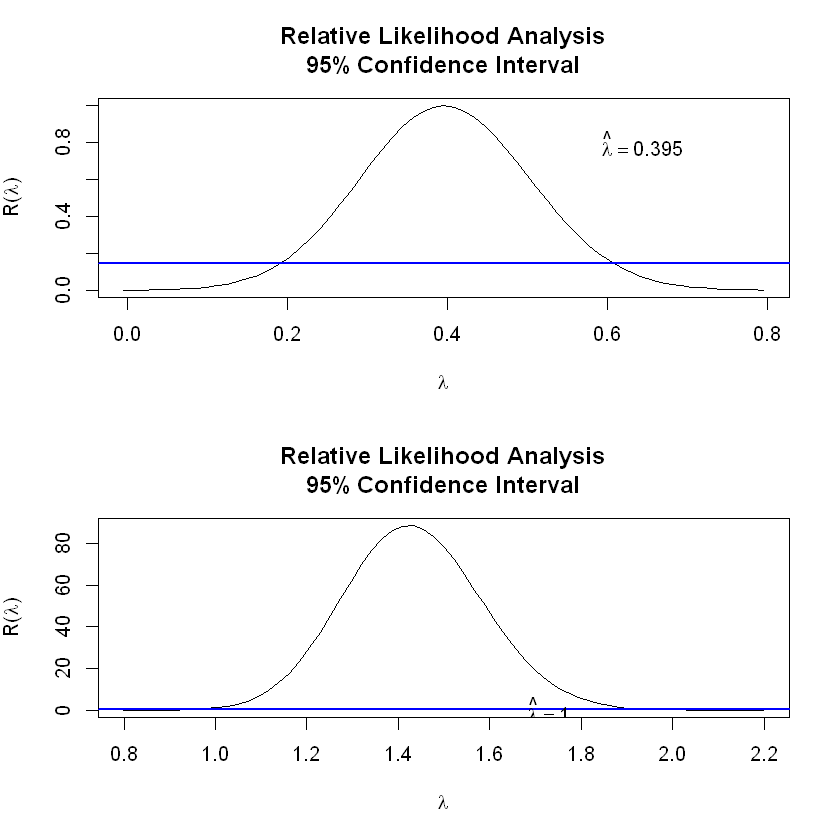

In [70]:
layout(mat=matrix(c(1,
                    2), nrow = 2, byrow = TRUE))
BoxCox(visitors)
BoxCox(diff(visitors, lag = 12))


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(0,1,2)[12] with drift
Q* = 19.26, df = 19, p-value = 0.4403

Model df: 5.   Total lags used: 24



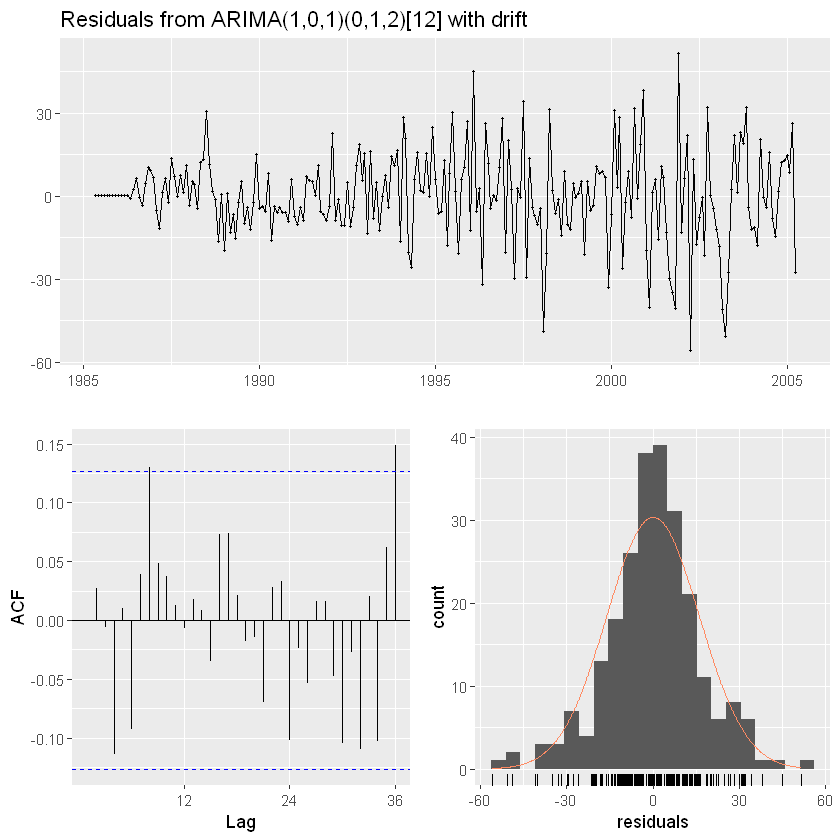

In [71]:
checkresiduals(fit5)

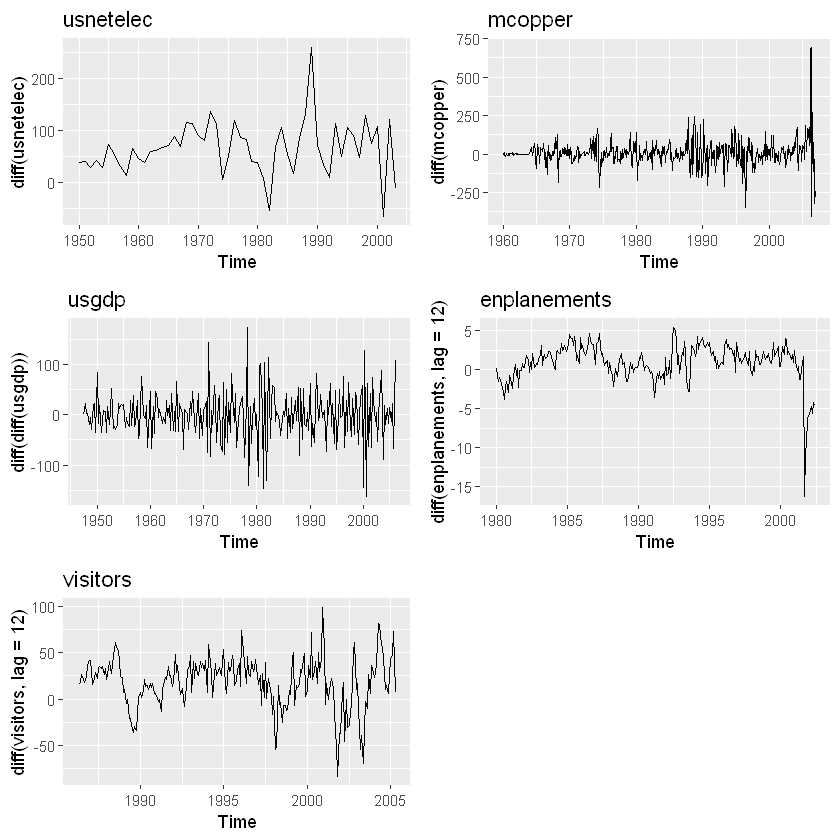

In [81]:
p1 <- autoplot(diff(usnetelec)) + ggtitle("usnetelec")
p2 <- autoplot(diff(diff(usgdp))) + ggtitle("usgdp")
p3 <- autoplot(diff(mcopper)) + ggtitle("mcopper")
p4 <- autoplot(diff(enplanements, lag = 12)) + ggtitle("enplanements")
p5 <- autoplot(diff(visitors, lag = 12)) + ggtitle("visitors")

grid.arrange(p1, p2, p3, p4, p5,
    layout_matrix = rbind(
        c(1, 3),
        c(2, 4),
        c(5, 6)))